<a href="https://colab.research.google.com/github/SeanMuInCa/learn_python/blob/master/4_Naive_bayes_classifier_(1)_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## predicting survival from titanic crash

The Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem.

Bayes theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event. It is given by:

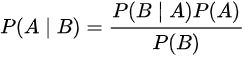
Where P(A|B) is the probabaility of occurrence of A knowing B already occurred and P(B|A) is the probability of occurrence of B knowing A occurred.

Scikit-learn Guide

There are mostly two types of Naive Bayes:

1. Gaussian Naive Bayes

2. Multinomial Naive Bayes.

Multinomial Naive Bayes
The method is used mostly for document classification. For example, classifying an article as sports article or say film magazine. It is also used for differentiating actual mails from spam mails. It uses the frequency of words used in different magazine to make a decision.

For example, the word "Dear" and "friends" are used a lot in actual mails and "offer" and "money" are used a lot in "Spam" mails. It calculates the prorbability of the occurrence of the words in case of actual mails and spam mails using the training examples. So, the probability of occurrence of "money" is much higher in case of spam mails and so on.

Now, we calculate the probability of a mail being a spam mail using the occurrence of words in it.

Gaussian Naive Bayes
When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution.



In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
df= df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)
df

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [ ]:
inputs=df.drop('Survived',axis='columns')

In [ ]:
target=df.Survived

In [ ]:
dummies=pd.get_dummies(inputs.Sex, dtype = 'int')

In [ ]:
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
inputs=pd.concat([inputs,dummies],axis='columns')
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [ ]:
inputs.drop(['Sex','male'],axis='columns',inplace=True)

In [ ]:
inputs.head(3)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,False
1,1,38.0,71.2833,True
2,3,26.0,7.9250,True


In [ ]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [ ]:
inputs.Age[:7]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN
6,54.0


In [ ]:
inputs.Age=inputs.Age.fillna(inputs.Age.mean())

In [ ]:
inputs.Age[:7]

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
5,29.699118
6,54.000000


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [ ]:
#training the model
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
model.score(x_test,y_test)

0.7761194029850746

In [ ]:
x_test[:10]

,Pclass,Age,Fare,female
303,2,29.699118,12.3500,True
160,3,44.000000,16.1000,False
751,3,6.000000,12.4750,False
478,3,22.000000,7.5208,False
66,2,29.000000,10.5000,True
334,1,29.699118,133.6500,True
502,3,29.699118,7.6292,True
118,1,24.000000,247.5208,False
180,3,29.699118,69.5500,True
132,3,47.000000,14.5000,True


In [ ]:
y_test[:10]

,Survived
303,1
160,0
751,1
478,0
66,1
334,1
502,0
118,0
180,0
132,0


In [ ]:
model.predict(x_test[0:10])

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
model.predict_proba(x_test[:10])

array([[2.94490616e-01, 7.05509384e-01],
       [9.73230892e-01, 2.67691077e-02],
       [9.53043169e-01, 4.69568306e-02],
       [9.67787292e-01, 3.22127079e-02],
       [2.90953476e-01, 7.09046524e-01],
       [2.52464239e-05, 9.99974754e-01],
       [4.76799315e-01, 5.23200685e-01],
       [3.85681222e-14, 1.00000000e+00],
       [1.43870919e-01, 8.56129081e-01],
       [4.91793599e-01, 5.08206401e-01]])

# model evaluation: evaluate your trained model with different classification metrics,
ref: https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall
video ref:https://www.youtube.com/watch?v=2osIZ-dSPGE




# class work : you are required to go through below dataset and do classification using naive bayes classifier: https://www.kaggle.com/datasets/himanshunakrani/naive-bayes-classification-data

In [1]:
import kagglehub
import pandas as pd
# Download latest version
path = kagglehub.dataset_download("himanshunakrani/naive-bayes-classification-data")

print("Path to dataset files:", path)
df = pd.read_csv(path + "/Naive-Bayes-Classification-Data.csv")
df

100%|██████████| 2.02k/2.02k [00:00<00:00, 3.73MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/himanshunakrani/naive-bayes-classification-data/versions/1


,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
...,...,...,...
990,45,87,0
991,40,83,0
992,40,83,0
993,40,60,1


In [2]:
df.isnull().sum()

,0
glucose,0
bloodpressure,0
diabetes,0


In [4]:
from sklearn.model_selection import train_test_split

# 特征列 X 和目标列 y
X = df[['glucose', 'bloodpressure']]  # 选择特征
y = df['diabetes']  # 选择目标变量

# 分割数据集，80% 作为训练集，20% 作为测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.naive_bayes import GaussianNB

# 创建高斯朴素贝叶斯分类器
model = GaussianNB()

# 训练模型
model.fit(X_train, y_train)


GaussianNB()

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

# 预测
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# 打印分类报告
print('Classification Report:')
print(classification_report(y_test, y_pred))

# 打印混淆矩阵
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')



Accuracy: 92.96%
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        93
           1       0.93      0.93      0.93       106

    accuracy                           0.93       199
   macro avg       0.93      0.93      0.93       199
weighted avg       0.93      0.93      0.93       199

Confusion Matrix:
[[86  7]
 [ 7 99]]
F1 Score: 0.9339622641509434
Precision: 0.9339622641509434
Recall: 0.9339622641509434
